In [1]:
options(warn = -1)

In [ ]:
# Station: NEU (Neuchâtel), precipitation dataset rre150d0
# Daily total precipitation, from 6 UTC to 6 UTC (next day)
# Temporal coverage: 31.12.1863 - 31.12.2023

# Packages for data processing
suppressMessages({
  install.packages("dplyr")
  install.packages("ggplot2")
  install.packages("zoo")
})

library(dplyr)
library(ggplot2)
library(zoo)

# Lecture correcte du fichier avec séparateur ";"
NEU_P <- read.table("NEU_rre150d0.txt", sep = ";", header = FALSE,
                    col.names = c("station", "date", "precip"))

# Conversion des dates
NEU_P$date <- as.Date(as.character(NEU_P$date), format = "%Y%m%d")
NEU_P$year <- format(NEU_P$date, "%Y")
NEU_P$month <- format(NEU_P$date, "%m")

# Check for missing values
sum(is.na(NEU_P))


Call:
lm(formula = Count_R10mm_NEU ~ Year, data = R10mm_summary_NEU)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.385  -9.492   0.354   9.116  34.785 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 126.94993   46.75552   2.715  0.00736 **
Year         -0.01411    0.02405  -0.587  0.55814   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.05 on 158 degrees of freedom
Multiple R-squared:  0.002175,	Adjusted R-squared:  -0.00414 
F-statistic: 0.3444 on 1 and 158 DF,  p-value: 0.5581


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


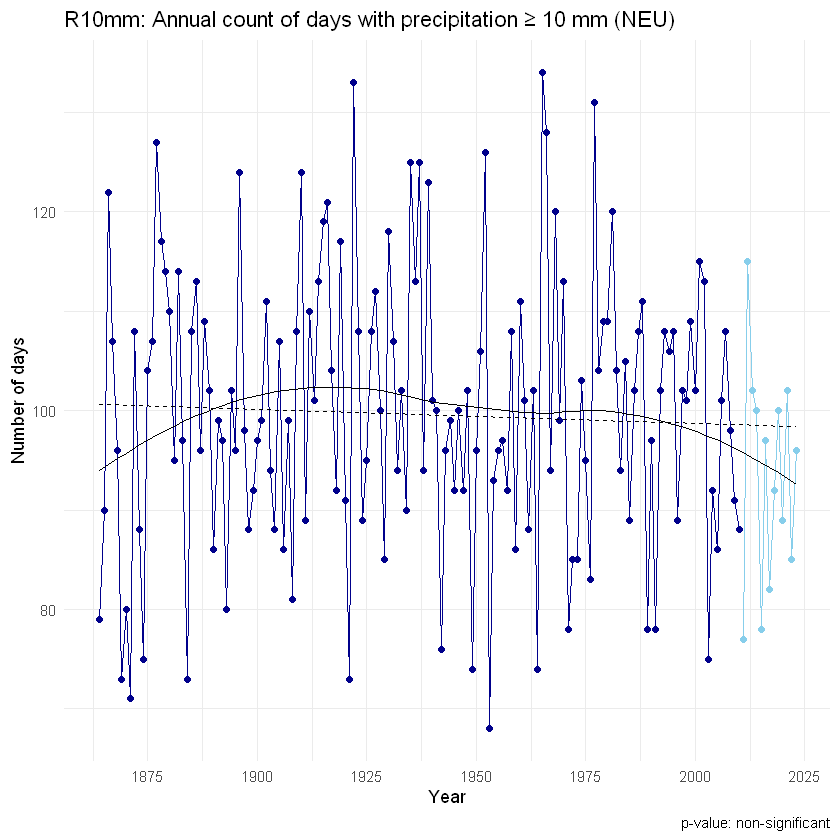

In [5]:
# R10mm
# Annual count of days with precipitation ≥ 10 mm
R10mm_days_NEU <- NEU_P[NEU_P$precip >= 10, ]
R10mm_summary_NEU <- aggregate(R10mm_days_NEU$precip, 
  by = list(Year = R10mm_days_NEU$year), FUN = length)
colnames(R10mm_summary_NEU)[2] <- "Count_R10mm_NEU"
R10mm_summary_NEU$Year <- as.numeric(R10mm_summary_NEU$Year)

# Linear trend analysis (based on all availible data)
model_R10mm_NEU <- lm(Count_R10mm_NEU ~ Year, data = R10mm_summary_NEU)
summary(model_R10mm_NEU)

# Data homogenization period (NEU) : 1864 to 2010
R10mm_summary_NEU$Dataset <- ifelse(R10mm_summary_NEU$Year <= 2010, 
                                    "homogenized","non-homogenized")
R10mm_homog_NEU <- R10mm_summary_NEU[R10mm_summary_NEU$Dataset == "homogenized", ]

# Graph with data homogenization period
ggplot(R10mm_summary_NEU, aes(x = Year, y = Count_R10mm_NEU)) +
geom_line(aes(color = Dataset), size = 0.5) +
geom_point(aes(color = Dataset)) +
geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed", linewidth = 0.5) +
geom_smooth(method = "loess", se = FALSE, color = "black", linewidth = 0.5) +
labs(title = "R10mm: Annual count of days with precipitation ≥ 10 mm (NEU)",
     x = "Year", y = "Number of days",
     caption = "p-value: non-significant") +
scale_y_continuous() +
scale_x_continuous(breaks = seq(1875, 2025, by = 25)) +
scale_color_manual(values = c("homogenized" = "darkblue", "non-homogenized" = "skyblue")) +
theme_minimal() +
theme(legend.position = "none")

# Summary statistics (homogenized data only)
  #Mean
mean_R10mm_homog_NEU <- mean(R10mm_homog_NEU$Count_R10mm_NEU, na.rm = TRUE)

  #Usual range 
range_R10mm_homog_NEU <- quantile(R10mm_homog_NEU$Count_R10mm, 
  probs = c(0.05, 0.95), na.rm = TRUE)


Call:
lm(formula = Total_R95p_NEU ~ Year, data = R95p_summary_NEU)

Residuals:
    Min      1Q  Median      3Q     Max 
-277.75  -81.27  -17.48   65.71  346.64 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 819.6758   429.6377   1.908   0.0582 .
Year         -0.1521     0.2210  -0.688   0.4923  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 129.1 on 158 degrees of freedom
Multiple R-squared:  0.002989,	Adjusted R-squared:  -0.003321 
F-statistic: 0.4737 on 1 and 158 DF,  p-value: 0.4923


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


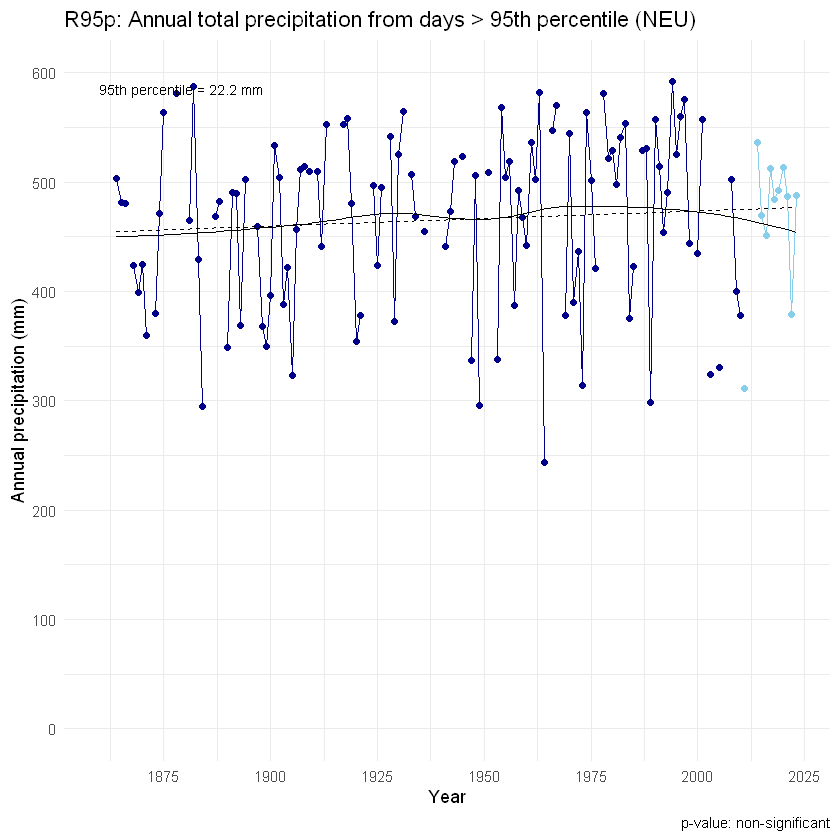

In [4]:
# R95pTOT
# Total annual precipitation from days exceeding the 95th percentile,
# Based on wet days (P ≥ 1 mm), during the 1961–1990 reference period  
  
# 95th percentile for wet days (1961–1990)
NEU_reference_period <- NEU_P[NEU_P$date >= as.Date("1961-01-01") & NEU_P$date <= as.Date("1990-12-31") &
  NEU_P$precip >= 1, ]
NEU_reference_period$precip <- as.numeric(as.character(NEU_reference_period$precip))
threshold_95_NEU <- quantile(NEU_reference_period$precip, 0.95, na.rm = TRUE)

# Days above the 95th percentile, and compute annual total
R95p_summary_NEU <- NEU_P[NEU_P$precip >= 1 & NEU_P$precip > threshold_95_NEU, ]
R95p_summary_NEU$precip <- as.numeric(as.character(R95p_summary_NEU$precip))
R95p_summary_NEU <- aggregate(R95p_summary_NEU$precip, 
  by = list(Year = R95p_summary_NEU$year),FUN = sum, na.rm = TRUE)
colnames(R95p_summary_NEU)[2] <- "Total_R95p_NEU"
R95p_summary_NEU$Year <- as.numeric(R95p_summary_NEU$Year)

# Linear trend analysis (based on all availible data)
model_R95p_NEU <- lm(Total_R95p_NEU ~ Year, data = R95p_summary_NEU)
summary(model_R95p_NEU)

# Data homogenization period (NEU) : 1864 to 2010
R95p_summary_NEU$Dataset <- ifelse(R95p_summary_NEU$Year <= 2010, 
  "homogenized","non-homogenized")
R95p_homog_NEU <- R95p_summary_NEU[R95p_summary_NEU$Dataset == "homogenized", ]

# Graph with data homogenization period
ggplot(R95p_summary_NEU, aes(x = Year, y = Total_R95p_NEU)) +
  geom_line(aes(color = Dataset), size = 0.5) +
  geom_point(aes(color = Dataset)) +
  geom_smooth(method = "lm", se = FALSE, color = "black", linetype = "dashed", linewidth = 0.5) +
  geom_smooth(method = "loess", se = FALSE, color = "black", linewidth = 0.5) +
  labs(title = "R95p: Annual total precipitation from days > 95th percentile (NEU)",
  x = "Year", y = "Annual precipitation (mm)", caption = "p-value: non-significant") +
  scale_y_continuous(limits = c(0, 600), breaks = seq(0, 600, by = 100)) +
  scale_x_continuous(breaks = seq(1875, 2025, by = 25)) +
  scale_color_manual(values = c("homogenized" = "darkblue", "non-homogenized" = "skyblue")) +
  theme_minimal() + theme(legend.position = "none") +
  annotate("text", x = 1860, y = 590, label = "95th percentile = 22.2 mm", hjust = 0, vjust = 1, size = 3, color = "black")

# Summary statistics (homogenized data only)
  # Mean
mean_R95p_homog_NEU <- mean(R95p_homog_NEU$Total_R95p_NEU, na.rm = TRUE)

 # Range
range_R95p_homog_NEU <- quantile(R95p_homog_NEU$Total_R95p_NEU, 
  probs = c(0.05, 0.95), na.rm = TRUE)